The Iris Dataset

This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray


## Loading the iris dataset



In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()


In [2]:
# Reading the CSV file 
df = pd.read_csv("Iris.csv") 
  
# Printing top 5 rows 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

We can see that the dataframe contains 6 columns and 150 rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that only one column has categorical data and all the other columns are of the numeric type with non-Null entries.

In [5]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that no column as any missing value.

In [7]:
data = df.drop_duplicates(subset ="Species",) 
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We can see that all the species contain an equal amount of rows, so we should not delete any entries.

Visualizing the target column
Our target column will be the Species column because at the end we will need the result according to the species only. Let’s see a countplot for species.

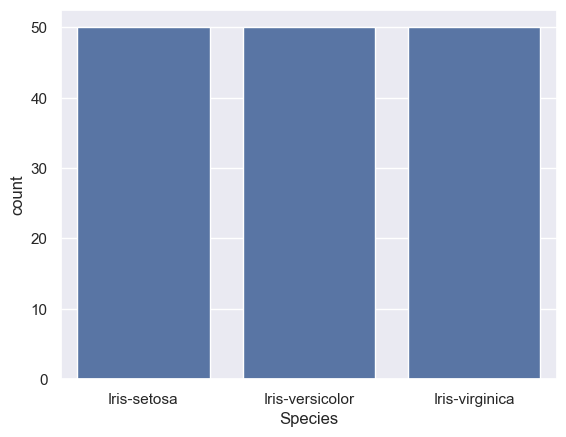

In [9]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt 


sns.countplot(x='Species', data=df, ) 
plt.show()


We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

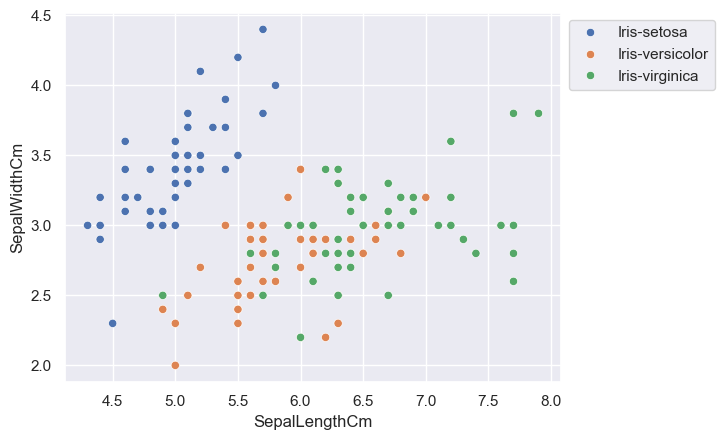

In [10]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', 
				hue='Species', data=df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.show()


From the above plot, we can infer that – 

Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.

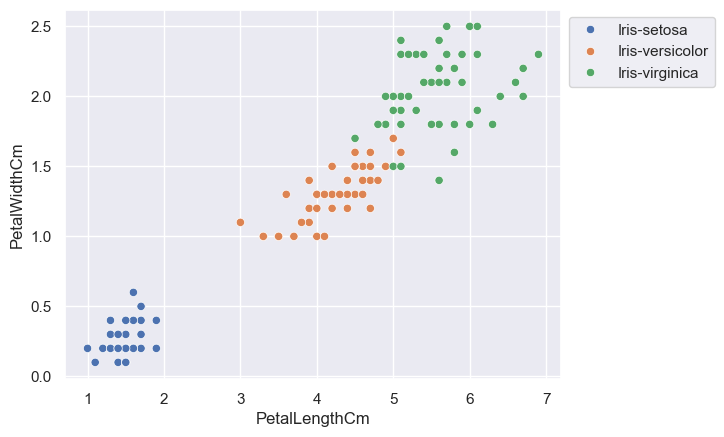

In [11]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', 
				hue='Species', data=df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.show()


From the above plot, we can infer that – 

Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.

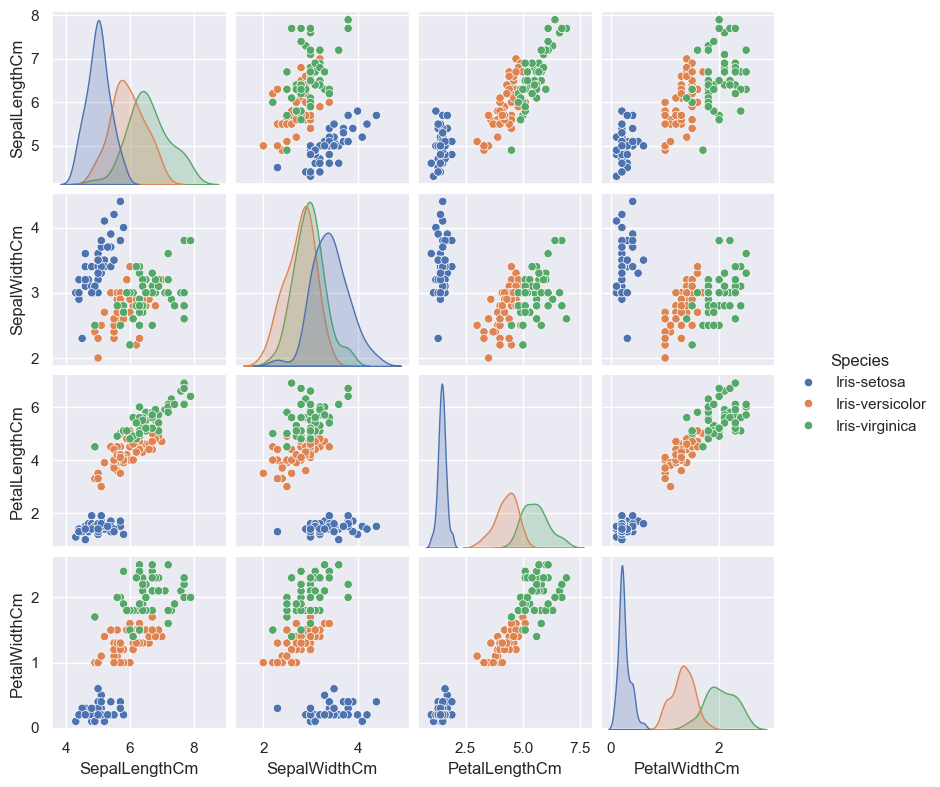

In [12]:
sns.pairplot(df.drop(['Id'], axis = 1), 
			hue='Species', height=2)


We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

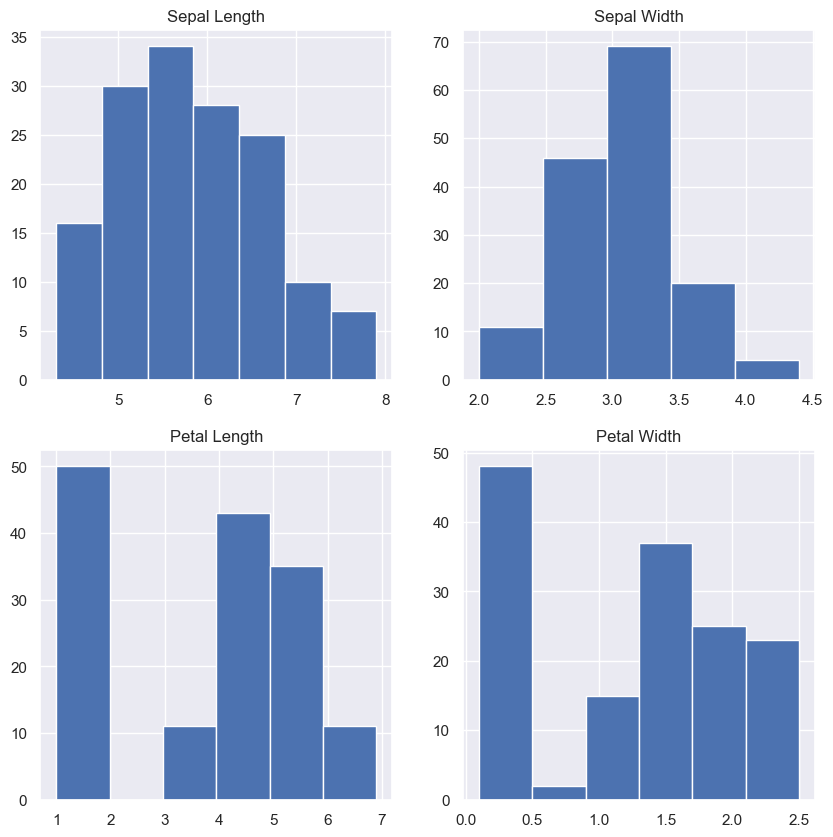

In [13]:

fig, axes = plt.subplots(2, 2, figsize=(10,10)) 

axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(df['SepalLengthCm'], bins=7) 

axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(df['SepalWidthCm'], bins=5); 

axes[1,0].set_title("Petal Length") 
axes[1,0].hist(df['PetalLengthCm'], bins=6); 

axes[1,1].set_title("Petal Width") 
axes[1,1].hist(df['PetalWidthCm'], bins=6);


From the above plot, we can see that – 

The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
The highest frequency of the petal length is around 50 which is between 1 and 2
The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

Histograms with Distplot Plot
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

C:\Users\anujk\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\anujk\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_

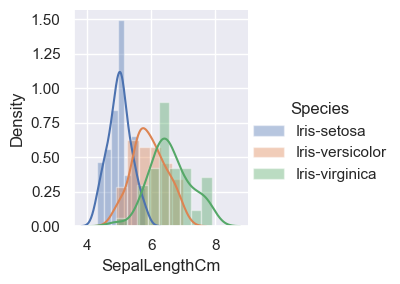

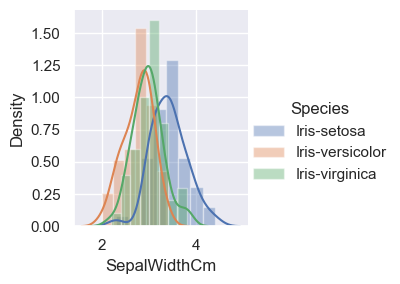

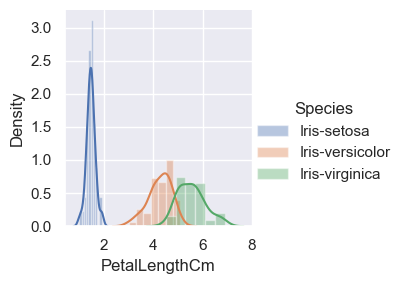

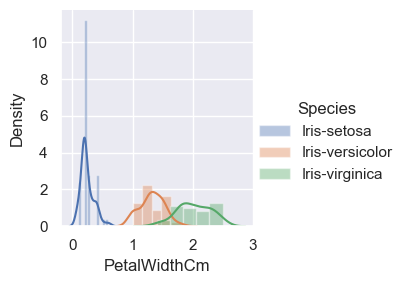

In [14]:

plot = sns.FacetGrid(df, hue="Species") 
plot.map(sns.distplot, "SepalLengthCm").add_legend() 

plot = sns.FacetGrid(df, hue="Species") 
plot.map(sns.distplot, "SepalWidthCm").add_legend() 

plot = sns.FacetGrid(df, hue="Species") 
plot.map(sns.distplot, "PetalLengthCm").add_legend() 

plot = sns.FacetGrid(df, hue="Species") 
plot.map(sns.distplot, "PetalWidthCm").add_legend() 

plt.show()


From the above plots, we can see that – 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.
So we can use Petal Length and Petal Width as the classification feature.

Handling Correlation
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [15]:
df['Species'].nunique()

3

In [16]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Species' is the column to be encoded
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
df.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


Heatmaps:
The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

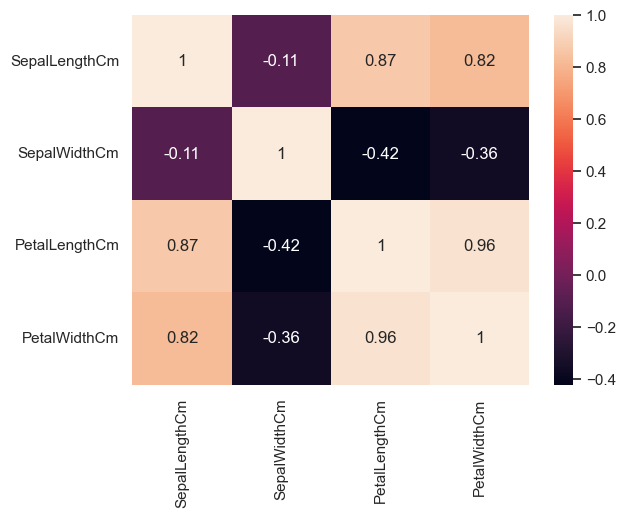

In [19]:

sns.heatmap(df.corr(method='pearson').drop( ['Id','Species'], axis=1).drop( ['Id','Species'], axis=0),annot=True,); 

plt.show()


From the above graph, we can see that –

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

Box Plots:
We can use boxplots to see how the categorical value os distributed with other numerical values.

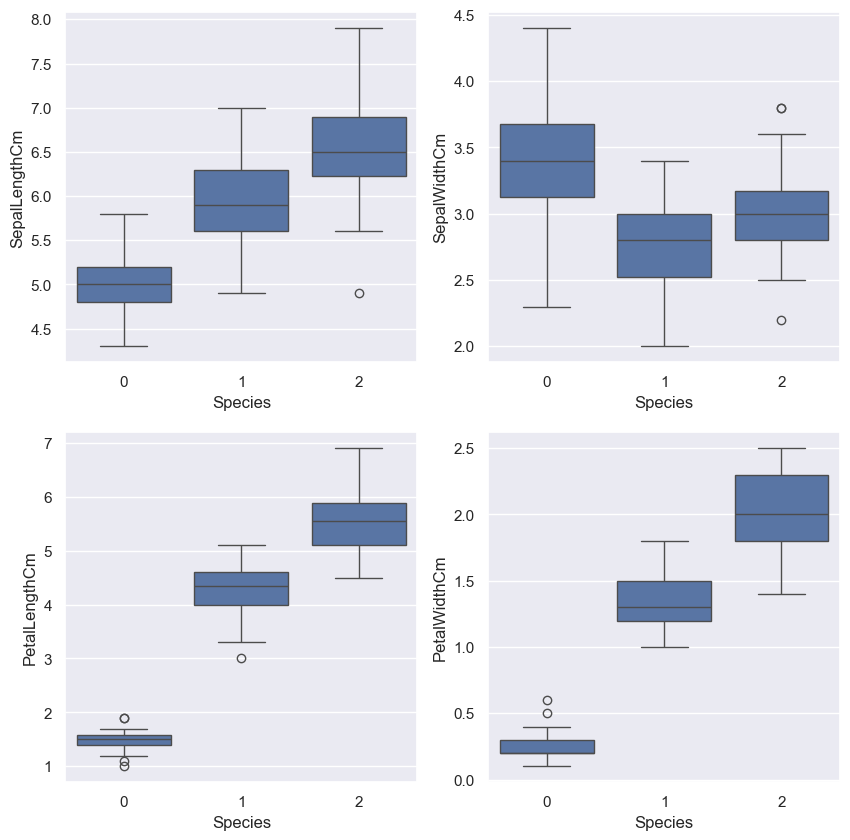

In [20]:

def graph(y): 
	sns.boxplot(x="Species", y=y, data=df) 

plt.figure(figsize=(10,10)) 
	
# Adding the subplot at the specified 
# grid position 
plt.subplot(221) 
graph('SepalLengthCm') 

plt.subplot(222) 
graph('SepalWidthCm') 

plt.subplot(223) 
graph('PetalLengthCm') 

plt.subplot(224) 
graph('PetalWidthCm') 

plt.show()


From the above graph, we can see that – 

0 Species Setosa has the smallest features and less distributed with some outliers.
1 Species Versicolor has the average features.
2 Species Virginica has the highest features

<Axes: xlabel='SepalWidthCm'>

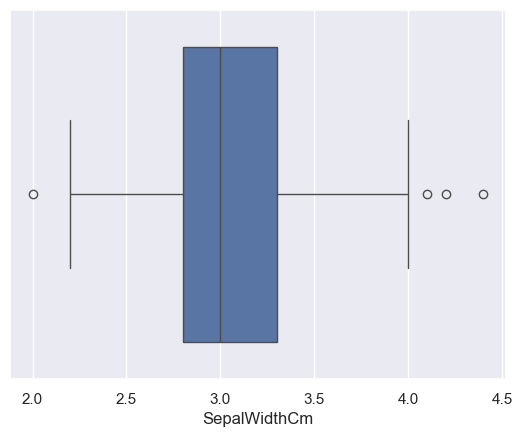

In [21]:

sns.boxplot(x='SepalWidthCm', data=df)

## Scatter Plot of the Iris dataset



In [22]:
from sklearn import datasets

iris = datasets.load_iris()

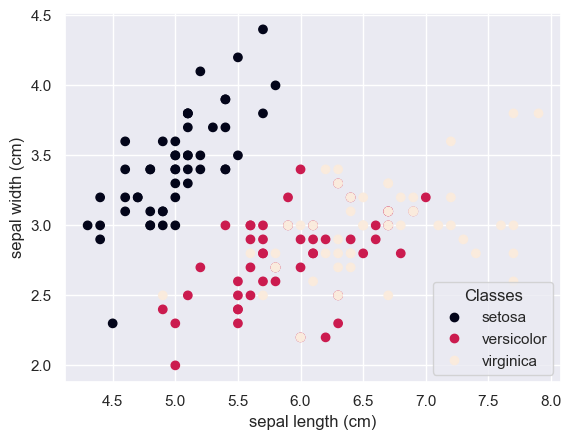

In [23]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Each point in the scatter plot refers to one of the 150 iris flowers
in the dataset, with the color indicating their respective type
(Setosa, Versicolour, and Virginica).
You can already see a pattern regarding the Setosa type, which is
easily identifiable based on its short and wide sepal. Only
considering these 2 dimensions, sepal width and length, there's still
overlap between the Versicolor and Virginica types.



## Plot a PCA representation
Let's apply a Principal Component Analysis (PCA) to the iris dataset
and then plot the irises across the first three PCA dimensions.
This will allow us to better differentiate between the three types!



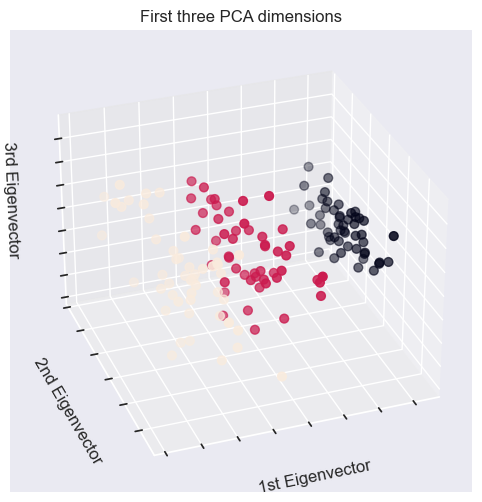

In [24]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

PCA will create 3 new features that are a linear combination of the
4 original features. In addition, this transform maximizes the variance.
With this transformation, we see that we can identify each species using
only the first feature (i.e. first eigenvalues).

